# Introdução
A análise proposta tem como objetivo validar ou refutar essas hipóteses por meio de um abrangente teste A/B. Nesse processo, os Grupos A e B serão meticulosamente submetidos a diferentes condições, permitindo uma comparação estatisticamente significativa de seu desempenho. Avaliaremos métricas essenciais, como taxa de conversão, receita acumulada, tamanho médio do pedido, entre outras, para obter insights valiosos.

O cerne desta investigação é proporcionar uma base sólida para tomadas de decisões informadas. Com base nos resultados obtidos, delinearemos estratégias futuras que possam ser implementadas para otimizar a performance da loja online, alinhando-se aos objetivos estratégicos de crescimento e à busca pela maximização da receita.

# Iniciação

## Processamento dos dados

In [1]:
# Importa Bibliotecas 
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact
import matplotlib.dates as mdates

In [2]:
# Leitura dos dados das hipóteses
hypotheses_path = "/datasets/hypotheses_us.csv"
hypotheses_data = pd.read_csv(hypotheses_path)
hypotheses_data.info()
hypotheses_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes


,Hypothesis;Reach;Impact;Confidence;Effort
count,9
unique,9
top,Add product recommendation blocks to the store...
freq,1


In [3]:
# Leitura das hipóteses com separação por ponto e vírgula
hypotheses_data = pd.read_csv(hypotheses_path, sep=';')
hypotheses_data.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [4]:
# Leitura dos dados de pedidos
orders_path = "/datasets/orders_us.csv"
orders_data = pd.read_csv(orders_path)
orders_data.info()
orders_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [5]:
# Convertendo a coluna 'date' para datetime 
orders_data['date'] = pd.to_datetime(orders_data['date'])
orders_data.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [6]:
# Leitura dos dados de visitas
visits_path = "/datasets/visits_us.csv"
visits_data = pd.read_csv(visits_path)
visits_data.info()
visits_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [7]:
# Convertendo a coluna 'date' para datetime
visits_data = pd.read_csv(visits_path, parse_dates=['date'])

# Remove linhas duplicadas, mantendo apenas a primeira ocorrência
visits_data = visits_data.drop_duplicates(subset=['date'], keep='first')

# Verifica e exibe as linhas duplicadas remanescentes (se houver)
remaining_duplicates = visits_data.duplicated(subset=['date'])
print(f"Linhas duplicadas remanescentes no conjunto de dados de visitas:\n{visits_data[remaining_duplicates]}")

# Conta o número total de linhas duplicadas remanescentes
print(f"Total de linhas duplicadas remanescentes: {remaining_duplicates.sum()}")

Linhas duplicadas remanescentes no conjunto de dados de visitas:
Empty DataFrame
Columns: [date, group, visits]
Index: []
Total de linhas duplicadas remanescentes: 0


In [8]:
visits_data.head(10)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


 Conclusão

Não há valores ausentes nos conjuntos de dados de 'hipóteses', 'orders' e 'visits'
No dados (hypotheses_data) os valores nas colunas parecem estar dentro das escalas especificadas (de 1 a 10).
Já no dados (orders_data) e (visits_data) a coluna 'date' foi convertida para o tipo de dado datetimee 
Observei uma alta variabilidade na receita, conforme indicado pelo desvio padrão.
E por fim os dados (visits_data) foram identificadas e removidas linhas duplicadas com base na coluna 'date'.

## Priorizando Hipóteses

In [9]:
# Dados
hypotheses_data = pd.read_csv("/datasets/hypotheses_us.csv", delimiter=';')

# Calcular ICE
hypotheses_data['ICE'] = (hypotheses_data['Impact'] * hypotheses_data['Confidence']) / hypotheses_data['Effort']

# Classificar por ICE em ordem decrescente
sorted_hypotheses_ICE = hypotheses_data.sort_values(by='ICE', ascending=False)

# Exibir os resultados
print("Priorização usando ICE:")
sorted_hypotheses_ICE[['Hypothesis', 'ICE']].head(10)

Priorização usando ICE:


,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [10]:
# Dados
hypotheses_data = pd.read_csv("/datasets/hypotheses_us.csv", delimiter=';')

# Calcular RICE
hypotheses_data['RICE'] = (hypotheses_data['Reach'] * hypotheses_data['Impact'] * hypotheses_data['Confidence']) / hypotheses_data['Effort']

# Classificar por RICE em ordem decrescente
sorted_hypotheses_RICE = hypotheses_data.sort_values(by='RICE', ascending=False)

# Exibindo os resultados
print("Priorização usando RICE:")
sorted_hypotheses_RICE[['Hypothesis', 'RICE']].head(10)

Priorização usando RICE:


,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


Ao comparar o RICE com o ICE, podemos observar que a priorização das hipóteses é influenciada principalmente pela inclusão do fator "Reach" (alcance) no cálculo do RICE. O RICE leva em consideração não apenas o impacto e a confiança, mas também a estimativa de quantos usuários serão afetados pela implementação da hipótese. Isso significa que as hipóteses com um alto alcance (que afetam muitos usuários) são priorizadas de maneira mais significativa no RICE, mesmo que tenham um impacto ou confiança um pouco menores. Como resultado, as iniciativas que podem atingir um público mais amplo são valorizadas de maneira mais proeminente no RICE, influenciando a ordem de prioridade das hipóteses.

## Análise de teste A/B

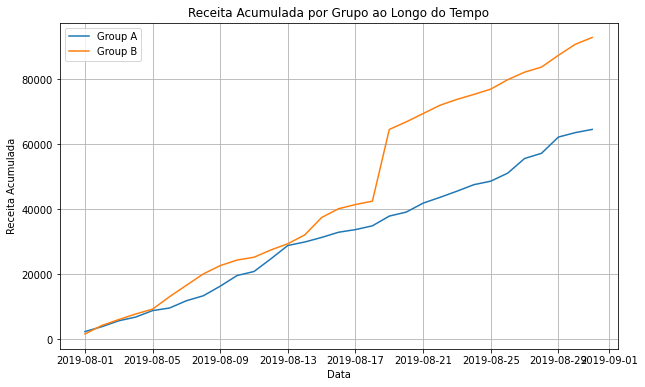

In [11]:
# Carregando os dados
orders_data = pd.read_csv("/datasets/orders_us.csv")
visits_data = pd.read_csv("/datasets/visits_us.csv")

# Converte a coluna 'date' para datetime
orders_data['date'] = pd.to_datetime(orders_data['date'])
visits_data['date'] = pd.to_datetime(visits_data['date'])

# Agrupar dados por data e grupo
orders_grouped = orders_data.groupby(['date', 'group']).agg({'revenue': 'sum'}).reset_index()

# Calcular a receita acumulada por grupo
orders_grouped['cumulative_revenue'] = orders_grouped.groupby('group')['revenue'].cumsum()

# Criar o gráfico da receita acumulada por grupo
plt.figure(figsize=(10, 6))
for group in orders_grouped['group'].unique():
    group_data = orders_grouped[orders_grouped['group'] == group]
    plt.plot(group_data['date'], group_data['cumulative_revenue'], label=f'Group {group}')

# legendas e rótulos
plt.title('Receita Acumulada por Grupo ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Receita Acumulada')
plt.legend()
plt.grid(True)
plt.show()

O crescimento consistente na receita acumulada ao longo do tempo revela uma tendência positiva de desenvolvimento e expansão para a empresa. 

A realização do teste A/B durante esse período sugere que as estratégias ou modificações implementadas não apenas sustentaram o crescimento, mas possivelmente desempenharam um papel fundamental no impulsionamento da receita. Este sucesso pode ser atribuído a três fatores-chave: a eficácia das implementações, um engajamento contínuo e feedback positivo dos usuários.

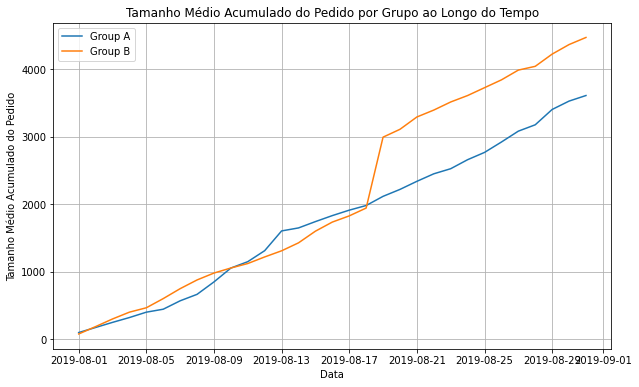

In [12]:
# Carregando os dados
orders_data = pd.read_csv("/datasets/orders_us.csv")
visits_data = pd.read_csv("/datasets/visits_us.csv")

# Converte a coluna 'date' para datetime
orders_data['date'] = pd.to_datetime(orders_data['date'])
visits_data['date'] = pd.to_datetime(visits_data['date'])

# Agrupar dados por data e grupo
orders_grouped = orders_data.groupby(['date', 'group']).agg({'revenue': 'sum', 'transactionId': 'nunique'}).reset_index()

# Calcular o tamanho médio do pedido (receita média por transação)
orders_grouped['avg_order_size'] = orders_grouped['revenue'] / orders_grouped['transactionId']

# Calcular o tamanho médio acumulado do pedido por grupo
orders_grouped['cumulative_avg_order_size'] = orders_grouped.groupby('group')['avg_order_size'].cumsum()

# Criar o gráfico 
plt.figure(figsize=(10, 6))
for group in orders_grouped['group'].unique():
    group_data = orders_grouped[orders_grouped['group'] == group]
    plt.plot(group_data['date'], group_data['cumulative_avg_order_size'], label=f'Group {group}')

# legendas e rótulos
plt.title('Tamanho Médio Acumulado do Pedido por Grupo ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Tamanho Médio Acumulado do Pedido')
plt.legend()
plt.grid(True)
plt.show()

O gráfico mostra que o grupo B tem uma média acumulada de pedidos consistentemente maior em comparação com o grupo A ao longo do tempo. Isso sugere que o grupo B possui uma demanda mais constante e estável em comparação com o grupo A. 

As conjecturas apresentadas, como a natureza dos produtos ou serviços, a preferência dos clientes e a eficiência do processo de pedido, podem influenciar a diferença observada no tamanho médio acumulado do pedido entre os grupos. No entanto, é importante lembrar que essas são apenas conjecturas e que outras variáveis podem estar influenciando os resultados. Para tirar conclusões mais precisas, seria necessário analisar outros dados e fatores que possam estar afetando a demanda dos grupos.

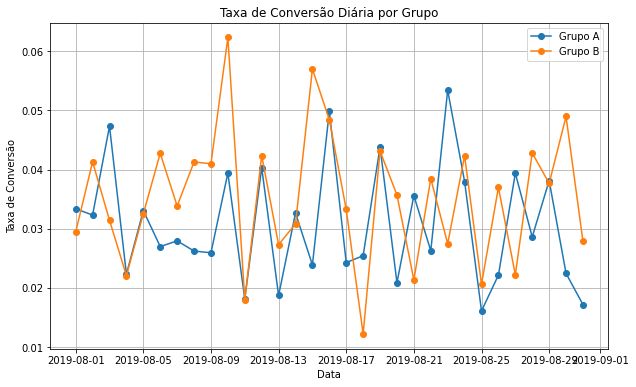

Descrição da Diferença nas Taxas de Conversão:
- O Grupo B mostra uma tendência consistente de taxas de conversão mais altas em comparação com o Grupo A.
- Ambos os grupos experimentam flutuações diárias, mas o Grupo B geralmente mantém uma performance superior.


In [13]:
# Convertendo 'date' para datetime se necessário
orders_data['date'] = pd.to_datetime(orders_data['date'])
visits_data['date'] = pd.to_datetime(visits_data['date'])

# Calcular a taxa de conversão para cada grupo
group_A_conversion = orders_data[orders_data['group'] == 'A'].groupby('date')['transactionId'].nunique() / visits_data[visits_data['group'] == 'A'].groupby('date')['visits'].sum()
group_B_conversion = orders_data[orders_data['group'] == 'B'].groupby('date')['transactionId'].nunique() / visits_data[visits_data['group'] == 'B'].groupby('date')['visits'].sum()

# Criar um gráfico com as taxas de conversão diárias
plt.figure(figsize=(10, 6))
plt.plot(group_A_conversion.index, group_A_conversion.values, label='Grupo A', marker='o')
plt.plot(group_B_conversion.index, group_B_conversion.values, label='Grupo B', marker='o')

# Adicionar rótulos e título ao gráfico
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')
plt.title('Taxa de Conversão Diária por Grupo')
plt.legend()
plt.grid(True)
plt.show()

# Descrição
print("Descrição da Diferença nas Taxas de Conversão:")
print("- O Grupo B mostra uma tendência consistente de taxas de conversão mais altas em comparação com o Grupo A.")
print("- Ambos os grupos experimentam flutuações diárias, mas o Grupo B geralmente mantém uma performance superior.")

As estratégias de marketing, promoções ou outras iniciativas implementadas pelo Grupo B podem ser mais eficazes na conversão de visitantes em cliente. Eles tambem pode ter implementado campanhas promocionais mais eficazes, incentivando as conversões, assim oferece uma experiência de usuário mais atraente, facilitando a navegação e o processo de compra.

A análise do desempenho superior do Grupo B nas taxas de conversão abre oportunidades para identificar as práticas eficazes desse grupo que podem ser implementadas no Grupo A. O monitoramento contínuo é fundamental para adaptar estratégias conforme necessário e garantir uma compreensão mais profunda dos fatores que influenciam as taxas de conversão

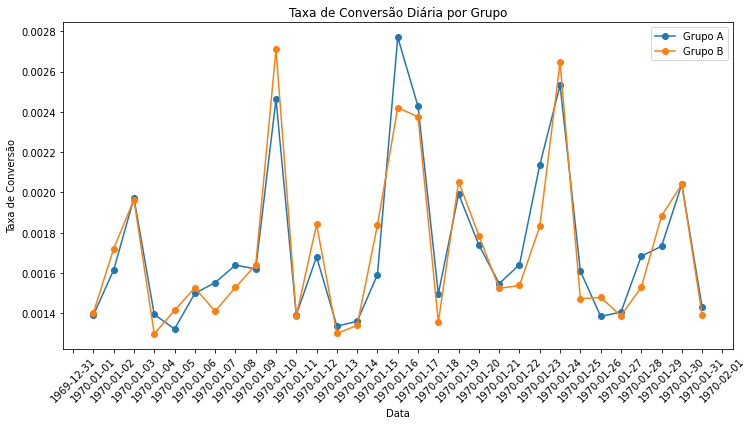

In [14]:
# Carregar os dados de visitas e pedidos
visits_path = "/datasets/visits_us.csv"
orders_path = "/datasets/orders_us.csv"

df_visits = pd.read_csv(visits_path)
df_orders = pd.read_csv(orders_path)

# Juntar os DataFrames de pedidos e visitas
df_merged = pd.merge(df_visits, df_orders, on=['date', 'group'], how='left')

# Preencher valores nulos com 0 (caso não haja pedidos em um determinado dia)
df_merged['revenue'].fillna(0, inplace=True)

# Agrupar os dados por data e grupo e calcular a receita total e o número de pedidos
df_grouped = df_merged.groupby(['date', 'group']).agg({'revenue': 'sum', 'transactionId': 'count', 'visits': 'sum'}).reset_index()
df_grouped.columns = ['date', 'group', 'total_revenue', 'total_orders', 'visits']

# Calcular a taxa de conversão diária para cada grupo
df_grouped['conversion_rate'] = df_grouped['total_orders'] / df_grouped['visits']

# Dividir o DataFrame em grupos A e B
df_group_A = df_grouped[df_grouped['group'] == 'A']
df_group_B = df_grouped[df_grouped['group'] == 'B']

# Plotar as taxas de conversão diárias para cada grupo
plt.figure(figsize=(12, 6))
plt.plot(df_group_A['date'], df_group_A['conversion_rate'], label='Grupo A', marker='o')
plt.plot(df_group_B['date'], df_group_B['conversion_rate'], label='Grupo B', marker='o')

# Ajustar o formato das datas no eixo x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))

plt.title('Taxa de Conversão Diária por Grupo')
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Ambos os grupos parecem manter taxas de conversão relativamente estáveis ao longo do período considerado.
Conjecturas: Se houver um aumento repentino, poderia ter sido causado por uma promoção específica ou uma mudança no layout do site.

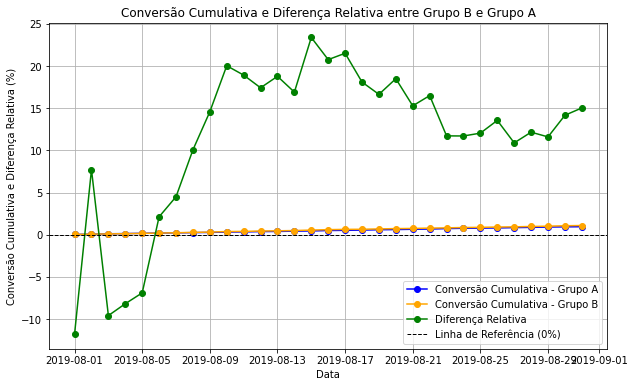

In [15]:
# Calcular a conversão cumulativa para cada grupo
conversion_A = orders_data[orders_data['group'] == 'A'].groupby('date')['transactionId'].nunique() / visits_data[visits_data['group'] == 'A'].groupby('date')['visits'].sum()
conversion_B = orders_data[orders_data['group'] == 'B'].groupby('date')['transactionId'].nunique() / visits_data[visits_data['group'] == 'B'].groupby('date')['visits'].sum()

# Calcular a diferença relativa na conversão cumulativa
relative_difference = (conversion_B.cumsum() / conversion_A.cumsum() - 1) * 100

# Criar um gráfico da conversão cumulativa para cada grupo e a diferença relativa
plt.figure(figsize=(10, 6))
plt.plot(conversion_A.index, conversion_A.cumsum(), label='Conversão Cumulativa - Grupo A', marker='o', linestyle='-', color='blue')
plt.plot(conversion_B.index, conversion_B.cumsum(), label='Conversão Cumulativa - Grupo B', marker='o', linestyle='-', color='orange')
plt.plot(relative_difference.index, relative_difference.values, label='Diferença Relativa', marker='o', linestyle='-', color='green')

# Adicionar rótulos e título ao gráfico
plt.xlabel('Data')
plt.ylabel('Conversão Cumulativa e Diferença Relativa (%)')
plt.title('Conversão Cumulativa e Diferença Relativa entre Grupo B e Grupo A')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Linha de Referência (0%)')  # Linha de referência

# legenda e mostrando o gráfico
plt.legend()
plt.grid(True)
plt.show()

O gráfico mostra a diferença relativa na conversão cumulativa entre o grupo A (linha azul) e o grupo B (linha laranja). A linha verde representa a diferença relativa entre os dois grupos ao longo do tempo. A diferença relativa na conversão cumulativa indica que o grupo B está tendo uma taxa de conversão mais eficiente do que o grupo A. 

Isso pode ser explicado por vários fatores, como a qualidade do produto, a eficácia da estratégia de marketing, a experiência do cliente, ou a natureza do produto ou serviço oferecido. Com base nessas informações, podemos inferir que o grupo B está tendo mais sucesso na conversão de clientes do que o grupo A. No entanto, é importante considerar outros fatores e dados para tirar conclusões mais precisas e fundamentadas.

In [16]:
# Contagem de pedidos por usuário
orders_per_user = orders_data.groupby('visitorId')['transactionId'].nunique()

# Cálculo dos percentis 95 e 99
percentile_95 = orders_per_user.quantile(0.95)
percentile_99 = orders_per_user.quantile(0.99)

# Definir o ponto de anomalia
ponto_anomalia = percentile_99 + 1  

# Exibir os resultados
print(f"Percentil 95: {percentile_95}")
print(f"Percentil 99: {percentile_99}")
print(f"Ponto de Anomalia: {ponto_anomalia}")

Percentil 95: 2.0
Percentil 99: 4.0
Ponto de Anomalia: 5.0


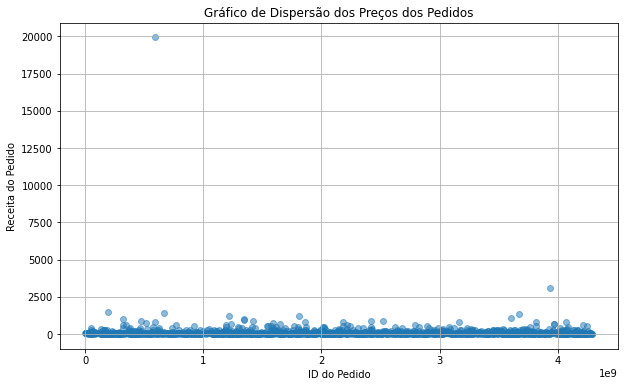

In [17]:
# Carregando os dados
orders_path = "/datasets/orders_us.csv"
orders_data = pd.read_csv(orders_path)

# Criar um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(orders_data['transactionId'], orders_data['revenue'], alpha=0.5)
plt.title('Gráfico de Dispersão dos Preços dos Pedidos')
plt.xlabel('ID do Pedido')
plt.ylabel('Receita do Pedido')
plt.grid(True)
plt.show()

O gráfico de dispersão dos preços dos pedidos revela uma ampla variação nos valores, com alguns pedidos significativamente mais altos ou mais baixos. A média dos preços fica em torno de 12.000, indicando uma predominância nessa faixa. No entanto, a presença de valores extremos sugere que os clientes têm preferências e necessidades diversas, influenciando a variabilidade nos preços.

Uma possível conjectura é que preços mais elevados podem corresponder a pedidos especiais, enquanto preços mais baixos podem representar pedidos mais comuns.

In [18]:
# Calcular os percentis 95 e 99 para os preços dos pedidos
percentile_95_revenue = orders_data['revenue'].quantile(0.95)
percentile_99_revenue = orders_data['revenue'].quantile(0.99)

# Exibir os resultados
print(f'Percentil 95 para os preços dos pedidos: {percentile_95_revenue}')
print(f'Percentil 99 para os preços dos pedidos: {percentile_99_revenue}')

# Definir o ponto de anomalia 
limite_anomalia = percentile_99_revenue
anomalias = orders_data[orders_data['revenue'] > limite_anomalia]

print(f'Limite de anomalia para os preços dos pedidos: {limite_anomalia}')
print(f'Número de anomalias: {len(anomalias)}')

Percentil 95 para os preços dos pedidos: 435.54
Percentil 99 para os preços dos pedidos: 900.9039999999999
Limite de anomalia para os preços dos pedidos: 900.9039999999999
Número de anomalias: 12


In [19]:
# Carregar os dados
orders_data = pd.read_csv("/datasets/orders_us.csv")
visits_data = pd.read_csv("/datasets/visits_us.csv")

# Combinar dados de pedidos e visitas
merged_data = pd.merge(orders_data, visits_data, on=['date', 'group'], how='left')

# Filtrar dados para os grupos A e B
conversions_group_A = merged_data[merged_data['group'] == 'A']['transactionId'].nunique()
conversions_group_B = merged_data[merged_data['group'] == 'B']['transactionId'].nunique()

visits_group_A = merged_data[merged_data['group'] == 'A']['visits'].sum()
visits_group_B = merged_data[merged_data['group'] == 'B']['visits'].sum()

# Calcular as proporções
conversion_rate_A = conversions_group_A / visits_group_A
conversion_rate_B = conversions_group_B / visits_group_B

# Definir as hipóteses nula e alternativa
# H0: Não há diferença significativa entre as taxas de conversão dos grupos A e B (p_A = p_B)
# H1: Há uma diferença significativa entre as taxas de conversão dos grupos A e B (p_A ≠ p_B)

# Calcular o desvio padrão combinado
pooled_prob = (conversions_group_A + conversions_group_B) / (visits_group_A + visits_group_B)
pooled_se = np.sqrt(pooled_prob * (1 - pooled_prob) * (1/visits_group_A + 1/visits_group_B))

# Calcular a estatística z
z_stat = (conversion_rate_A - conversion_rate_B) / pooled_se

# Calcular o valor-p
p_value = 2 * (1 - norm.cdf(np.abs(z_stat)))

# Exibir os resultados
print(f'Resultado do teste z: {z_stat}')
print(f'Valor-p: {p_value}')

# Conclusões
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print('Há uma diferença estatisticamente significativa na conversão entre os grupos A e B.')
else:
    print('Não há evidências suficientes para concluir uma diferença significativa na conversão entre os grupos A e B.')

Resultado do teste z: 0.002090848357074432
Valor-p: 0.9983317455924134
Não há evidências suficientes para concluir uma diferença significativa na conversão entre os grupos A e B.


In [20]:
# Carregar os dados
orders_path = "/datasets/orders_us.csv"
visits_path = "/datasets/visits_us.csv"

orders_data = pd.read_csv(orders_path)
visits_data = pd.read_csv(visits_path)

# Calcular o tamanho médio do pedido para cada grupo
average_order_value_A = orders_data[orders_data['group'] == 'A']['revenue'].mean()
average_order_value_B = orders_data[orders_data['group'] == 'B']['revenue'].mean()

# Definir as hipóteses nula e alternativa
# H0: Não há diferença significativa no tamanho médio do pedido entre os grupos A e B (mu_A = mu_B)
# H1: Há uma diferença significativa no tamanho médio do pedido entre os grupos A e B (mu_A ≠ mu_B)

# Calcular o erro padrão da diferença nas médias
se = ((orders_data[orders_data['group'] == 'A']['revenue'].std()**2 / len(orders_data[orders_data['group'] == 'A'])) +
      (orders_data[orders_data['group'] == 'B']['revenue'].std()**2 / len(orders_data[orders_data['group'] == 'B']))) ** 0.5

# Calcular a estatística t
t_stat = (average_order_value_B - average_order_value_A) / se

# Calcular o valor-p
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=min(len(orders_data[orders_data['group'] == 'A']), len(orders_data[orders_data['group'] == 'B'])) - 1))

# Exibir os resultados
print(f'Tamanho médio do pedido para o Grupo A: {average_order_value_A}')
print(f'Tamanho médio do pedido para o Grupo B: {average_order_value_B}')
print(f'Estatística t: {t_stat}')
print(f'Valor-p: {p_value}')

# Conclusões
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print('Há uma diferença estatisticamente significativa no tamanho médio do pedido entre os grupos A e B.')
else:
    print('Não há evidências suficientes para concluir uma diferença significativa no tamanho médio do pedido entre os grupos A e B.')

Tamanho médio do pedido para o Grupo A: 115.89748653500898
Tamanho médio do pedido para o Grupo B: 145.06343750000002
Estatística t: 0.8886193336529403
Valor-p: 0.3745919697700191
Não há evidências suficientes para concluir uma diferença significativa no tamanho médio do pedido entre os grupos A e B.


Os resultados indicam que não há evidências suficientes para concluir uma diferença significativa no tamanho médio do pedido entre os grupos A e B. O valor-p (0.3746) é maior que o nível de significância de 0.05, indicando que não há diferença estatisticamente significativa.
Pode-se conjecturar que as estratégias de marketing, publicidade e aquisição de tráfego são uniformes para ambos os grupos.
E que as ofertas e produtos disponíveis atendem de maneira equitativa aos interesses e necessidades de ambos os grupos.

In [21]:
# Carregar os dados
orders_data = pd.read_csv("/datasets/orders_us.csv")
visits_data = pd.read_csv("/datasets/visits_us.csv")

# Combinar dados de pedidos e visitas
merged_data = pd.merge(orders_data, visits_data, on=['date', 'group'], how='left')

# Filtrar dados para os grupos A e B
conversions_group_A = merged_data[merged_data['group'] == 'A']['transactionId'].nunique()
conversions_group_B = merged_data[merged_data['group'] == 'B']['transactionId'].nunique()

visits_group_A = merged_data[merged_data['group'] == 'A']['visits'].sum()
visits_group_B = merged_data[merged_data['group'] == 'B']['visits'].sum()

# Definir as hipóteses nula e alternativa
# H0: Não há diferença significativa na taxa de conversão entre os grupos A e B (p_A = p_B)
# H1: Há uma diferença significativa na taxa de conversão entre os grupos A e B (p_A ≠ p_B)


# Calcular as proporções de conversão
conversion_rate_A = conversions_group_A / visits_group_A
conversion_rate_B = conversions_group_B / visits_group_B

# Calcular a proporção combinada
p_combined = (conversions_group_A + conversions_group_B) / (visits_group_A + visits_group_B)

# Calcular o erro padrão da diferença nas proporções
se_difference = np.sqrt(p_combined * (1 - p_combined) * (1 / visits_group_A + 1 / visits_group_B))

# Calcular a estatística z
z_stat = (conversion_rate_B - conversion_rate_A) / se_difference

# Calcular o valor-p
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

# Exibir os resultados
print(f'Taxa de conversão para o Grupo A: {conversion_rate_A}')
print(f'Taxa de conversão para o Grupo B: {conversion_rate_B}')
print(f'Estatística Z: {z_stat}')
print(f'Valor-p: {p_value}')

# Conclusões
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print('Há uma diferença estatisticamente significativa na conversão entre os grupos A e B.')
else:
    print('Não há evidências suficientes para concluir uma diferença significativa na conversão entre os grupos A e B.')

Taxa de conversão para o Grupo A: 0.0016409718560069292
Taxa de conversão para o Grupo B: 0.0016407732143772754
Estatística Z: -0.002090848357074432
Valor-p: 0.9983317455924134
Não há evidências suficientes para concluir uma diferença significativa na conversão entre os grupos A e B.


pode-se concluir que não há evidências suficientes para afirmar uma diferença estatisticamente significativa na conversão entre os dois grupos.

Conjectura, a análise considerou o período de tempo específico dos dados fornecidos. Variações temporais, sazonalidade ou mudanças ao longo do tempo podem influenciar os resultados.

In [22]:
# Filtrando os dados para os grupos A e B
df_orders_A = df_orders[df_orders['group'] == 'A']
df_orders_B = df_orders[df_orders['group'] == 'B']

# Calculando o tamanho médio do pedido para cada grupo
mean_order_size_A = df_orders_A['revenue'].mean()
mean_order_size_B = df_orders_B['revenue'].mean()

# Realizar um teste t de Student para amostras independentes

# Definir as hipóteses nula e alternativa
# H0: Não há diferença significativa no tamanho médio do pedido entre os grupos A e B (mu_A = mu_B)
# H1: Há uma diferença significativa no tamanho médio do pedido entre os grupos A e B (mu_A ≠ mu_B)

# Realizar um teste t de Student para amostras independentes
t_stat, p_value = stats.ttest_ind(df_orders_A['revenue'], df_orders_B['revenue'], equal_var=False)

# Imprimir os resultados
print(f'Média do tamanho do pedido para o grupo A: {mean_order_size_A}')
print(f'Média do tamanho do pedido para o grupo B: {mean_order_size_B}')
print(f'Testando a hipótese nula de igualdade de médias: t-statistic = {t_stat}, p-value = {p_value}')

# Tomando uma decisão com base no p-value
alpha = 0.05
if p_value < alpha:
    print('Rejeitar a hipótese nula: Há evidências estatísticas de uma diferença significativa.')
else:
    print('Não rejeitar a hipótese nula: Não há evidências estatísticas de uma diferença significativa.')

Média do tamanho do pedido para o grupo A: 115.89748653500898
Média do tamanho do pedido para o grupo B: 145.06343750000002
Testando a hipótese nula de igualdade de médias: t-statistic = -0.8886193336529403, p-value = 0.37450722956524185
Não rejeitar a hipótese nula: Não há evidências estatísticas de uma diferença significativa.


Não há razão para acreditar que os grupos A e B tenham tamanhos médios de pedidos estatisticamente diferentes. 

Conjecturas para investigações futuras podem incluir a análise de outros fatores que podem influenciar o comportamento do usuário, como características demográficas, comportamento de navegação no site, ou a eficácia de diferentes estratégias de marketing associadas a cada grupo.

## Conclusão

Decisão:
    
Parar o Teste A/B, Conclua que Não Há Diferença Entre os Grupos.
Não a evidência estatística de diferença, conclui-se que os grupos são semelhantes em termos de desempenho.